#                  **SpaceX  Falcon 9 first stage Landing Prediction:Unveiling the Insights and Features**

In this analysis, we delve into the rich dataset of SpaceX Falcon 9 launches, exploring the factors influencing the first stage landing outcomes. Utilizing visualizations and statistical summaries, we uncover patterns related to flight number, payload mass, launch sites, and orbit types. This comprehensive exploration provides valuable insights for understanding the dynamics of successful landings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


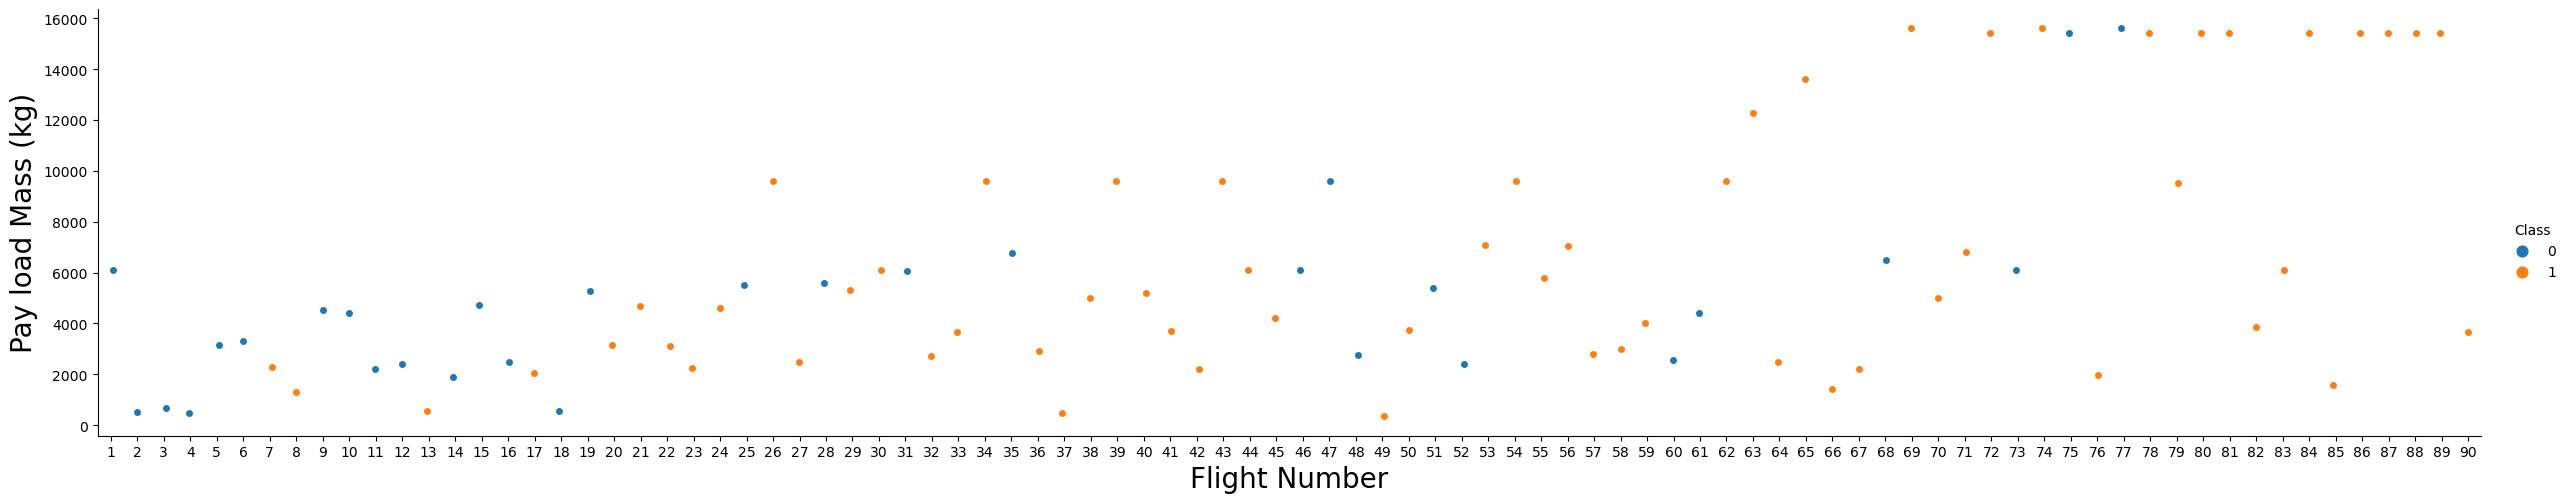

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Let's plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


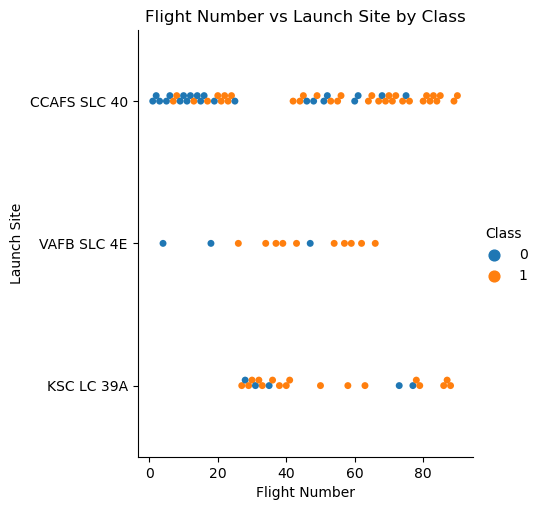

In [4]:
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, kind='swarm')
plt.title('Flight Number vs Launch Site by Class')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.show()

We can see CCAFS SLC 40 had more flights then in combination with the VAFB SLC 4E and KSC LC 39A. Also VAFB SLC 4E and KSC LC 39A has higher success rate as compare to CCAFS SLC 40.

Now try to explain the patterns we found in the Flight Number vs. Launch Site scatter point plots.


<Figure size 1200x800 with 0 Axes>

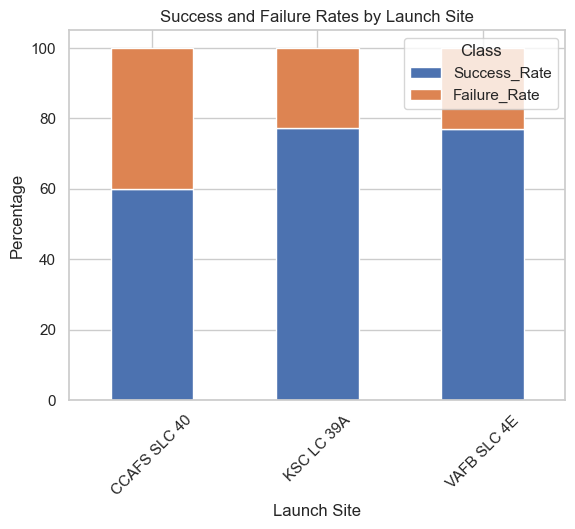

In [5]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))

# Calculate the percentages of success and failure for each launch site
site_data = df.groupby(['LaunchSite', 'Class']).size().unstack()
site_data['Total'] = site_data.sum(axis=1)
site_data['Success_Rate'] = (site_data[1] / site_data['Total']) * 100
site_data['Failure_Rate'] = (site_data[0] / site_data['Total']) * 100

# Plotting the success and failure percentages
site_data[['Success_Rate', 'Failure_Rate']].plot(kind='bar', stacked=True)
plt.title('Success and Failure Rates by Launch Site')
plt.xlabel('Launch Site')
plt.ylabel('Percentage')
plt.legend(title='Class', loc='upper right')
plt.xticks(rotation=45)
plt.show()


We also want to observe if there is any relationship between launch sites and their payload mass.


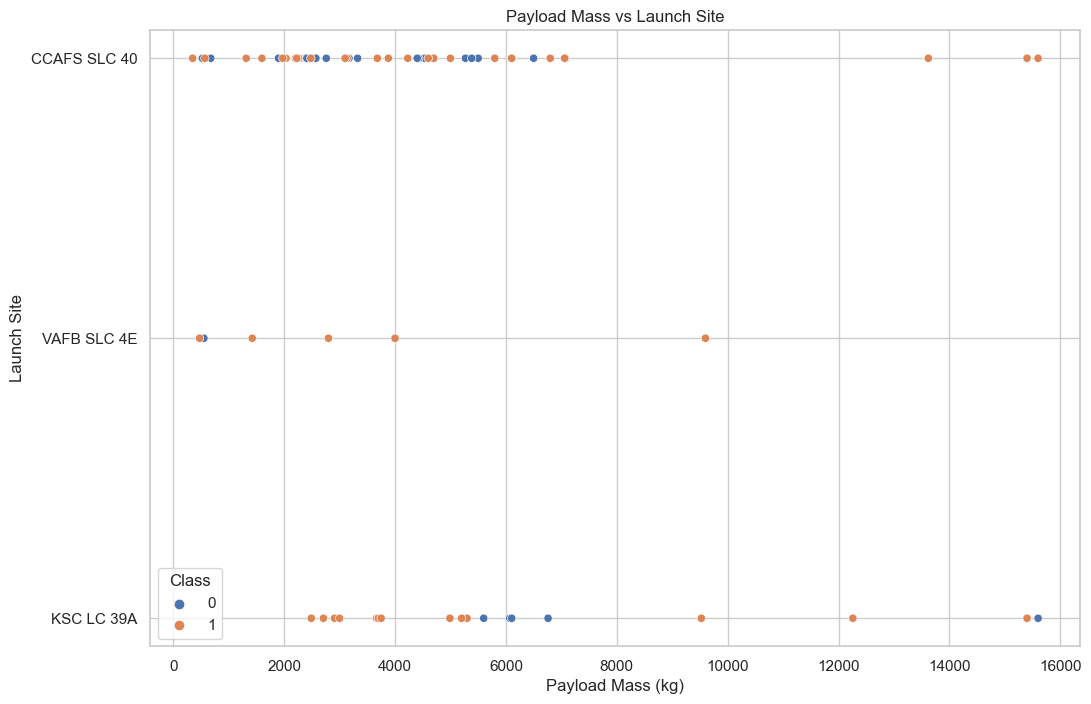

In [6]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df)
plt.title('Payload Mass vs Launch Site')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.legend(title='Class')
plt.show()

Now if we observe Payload Vs. Launch Site scatter point chart we will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).

Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


    Orbit     Class
0   ES-L1  1.000000
1     GEO  1.000000
2     GTO  0.518519
3     HEO  1.000000
4     ISS  0.619048
5     LEO  0.714286
6     MEO  0.666667
7      PO  0.666667
8      SO  0.000000
9     SSO  1.000000
10   VLEO  0.857143


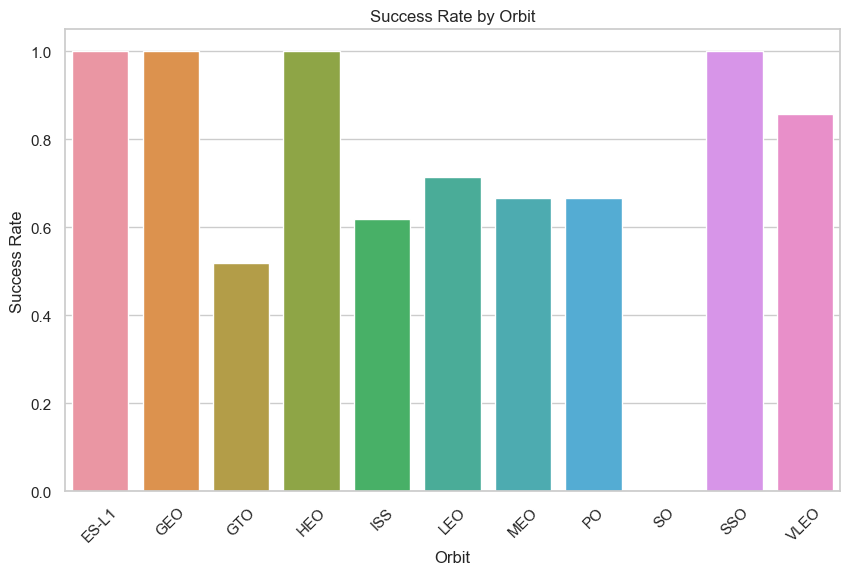

In [7]:
success_rate_by_orbit = df.groupby('Orbit')['Class'].mean().reset_index()
print(success_rate_by_orbit)
plt.figure(figsize=(10, 6))
sns.barplot(x='Orbit', y='Class', data=success_rate_by_orbit)
plt.title('Success Rate by Orbit')
plt.xlabel('Orbit')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.show()


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


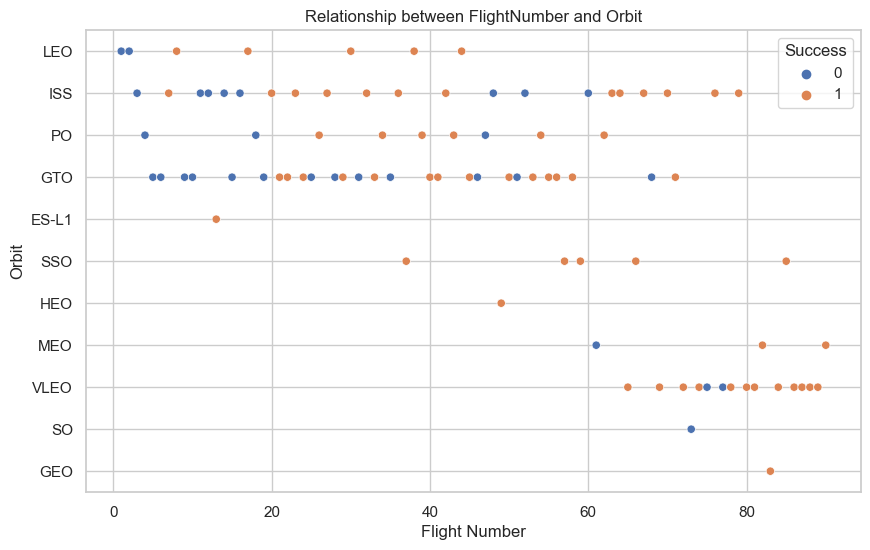

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FlightNumber', y='Orbit', data=df, hue='Class')
plt.title('Relationship between FlightNumber and Orbit')
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.legend(title='Success')
plt.show()


We can see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


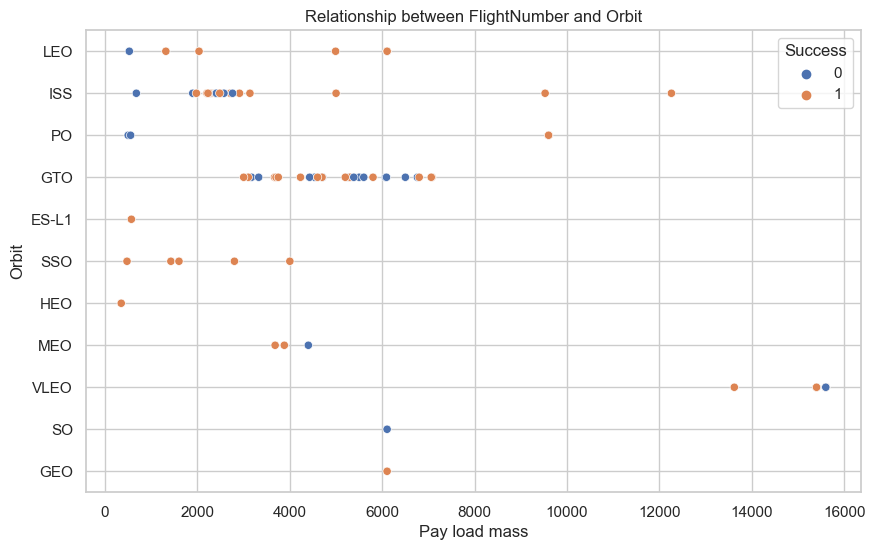

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PayloadMass', y='Orbit', data=df, hue='Class')
plt.title('Relationship between FlightNumber and Orbit')
plt.xlabel('Pay load mass')
plt.ylabel('Orbit')
plt.legend(title='Success')
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




We can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 


In [10]:
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

In [11]:
#Extract_year(df)
#print(year)

In [12]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [18]:
success_rates = df.groupby('Year')['Class'].mean().reset_index()

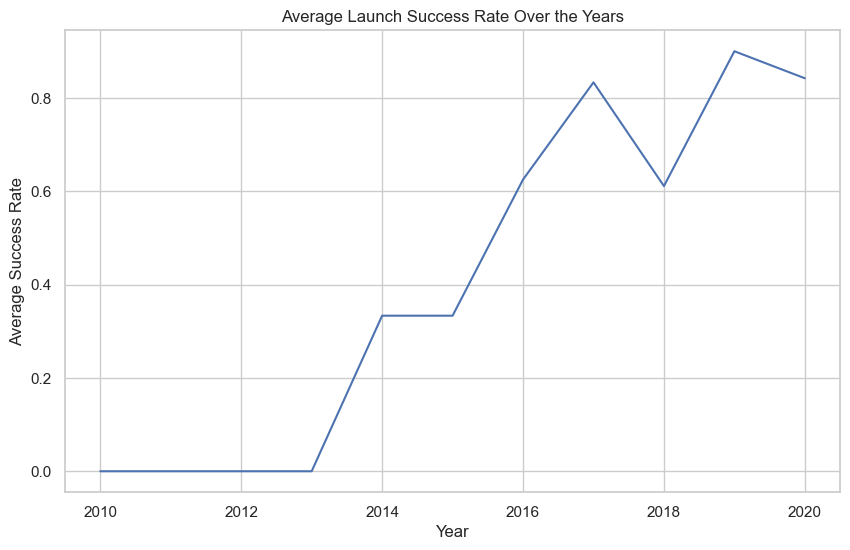

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Class', data=success_rates)
plt.title('Average Launch Success Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.show()

We can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering 



By now, we have obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [20]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


We will apply the function <code>get_dummies</code> on <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>.


In [25]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial', 'GridFins','Reused','Legs'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1,6104.959412,1,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,2,525.000000,1,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,3,677.000000,1,1.0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
3,4,500.000000,1,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,5,3170.000000,1,1.0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0


Now we have all the features in numeric value which will be helpful to apply model for SpaceX Falcon 9 first stage Landing Prediction.